<a href="https://colab.research.google.com/github/chrisfinan/IDS/blob/main/HW4/problem2_r_ipynp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chris Finan

> 11/3/23

> Project 4


## Description


> In this notebook I will analyze a dataset on nutrition in R. This includes sorting the data to get a bigger picture, as well as analyzing outliers. Some math is also used to compare columns to each other to get a better picture of the dataset and further explain it.


## 1. Use the following nutrition dataset: https://github.com/bforoura/IDS/blob/main/HW4/nutrition_subset.csvLinks

In [28]:
# Let's read in the data file
library(readr)
nutrition_subset <- read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/nutrition_subset.csv", show_col_types = FALSE)

## 2. The elements in the data set are food items of various sizes, ranging from a teaspoon of cinnamon to an entire carrot cake.

In [29]:
#Print the data frame
print(nutrition_subset)

#Summarize and describe the data set to visualize some of its properties
summary(nutrition_subset)

# A tibble: 961 × 4
   `food item`                         weight_in_grams saturated_fat cholesterol
   <chr>                                         <dbl>         <dbl>       <dbl>
 1 GELATIN; DRY                  1 EN…             7             0             0
 2 SEAWEED; SPIRULINA; DRIED     1 OZ             28.4           0.8           0
 3 YEAST; BAKERS; DRY; ACTIVE    1 PKG             7             0             0
 4 PARMESAN CHEESE; GRATED       1 OZ             28.4           5.4          22
 5 PARMESAN CHEESE; GRATED       1 CUP           100            19.1          79
 6 PARMESAN CHEESE; GRATED       1 TB…             5             1             4
 7 YEAST; BREWERS; DRY           1 TB…             8             0             0
 8 LAMB;CHOPS;ARM;BRAISED;LEAN   1.7 …            48             2.9          59
 9 TUNA; CANND; DRND;WATR; WHITE 3 OZ             85             0.3          48
10 NONFAT DRY MILK; INSTANTIZED  1 CUP            68             0.3          12
# ℹ 951 

  food item         weight_in_grams  saturated_fat      cholesterol     
 Length:961         Min.   :   0.4   Min.   :  0.000   Min.   :   0.00  
 Class :character   1st Qu.:  32.0   1st Qu.:  0.000   1st Qu.:   0.00  
 Mode  :character   Median : 113.0   Median :  0.400   Median :   0.00  
                    Mean   : 149.4   Mean   :  3.988   Mean   :  32.55  
                    3rd Qu.: 218.0   3rd Qu.:  3.300   3rd Qu.:  20.00  
                    Max.   :1542.0   Max.   :119.900   Max.   :2053.00  

As you can see in the data set, there are quite a few 0 values in the saturated fat and cholesterol columns. In some data sets, many 0 values may seem like an error, but for this data on nutrition, it is possible for certain types of food or beverages to hve 0 grams of saturated fat or cholesterol.

## 3. Sort the data set by saturated_fat and produce a listing of the five food items highest in saturated fat. Comment on the validity of comparing food items of different sizes.

In [30]:
#Sort the data set by saturated fat descending so the top 5 highest are visible on the top
nutrition_subset <- nutrition_subset[order(nutrition_subset$saturated_fat, decreasing = TRUE), ]

#Print sorted data set
print(nutrition_subset)

# A tibble: 961 × 4
   `food item`                         weight_in_grams saturated_fat cholesterol
   <chr>                                         <dbl>         <dbl>       <dbl>
 1 CHEESECAKE                    1 CA…            1110         120.         2053
 2 ICE CREAM; VANLLA; RICH 16% FT1/2 …            1188         118.          703
 3 YELLOWCAKE W/ CHOCFRSTNG;COMML1 CA…            1108          92           609
 4 CREME PIE                     1 PIE             910          90.1          46
 5 LARD                          1 CUP             205          80.4         195
 6 ICE CREAM; VANLLA; REGULR 11% 1/2 …            1064          71.3         476
 7 CARROT CAKE;CREMCHESE FRST;REC1 CA…            1536          66          1183
 8 BUTTER; SALTED                1/2 …             113          57.1         247
 9 BUTTER; UNSALTED              1/2 …             113          57.1         247
10 DEVIL'S FOOD CAKE;CHOCFRST;FMX1 CA…            1107          55.6         598
# ℹ 951 

As you can see from the sorted data set above, the top 5 saturated fat food items are displayed. If you take a look at the described data set above (from #2), the third quartile weight is 218 and the max weight is 1542. The top 4 saturated fat food items fall above the third quartile, but the cup of lard ways much less than the top 4 items. This shows that the validity of analyzing foods of different sizes can be flawed. The lard has a much higher saturated fat content for its weight and would easily move its way up the ranks if there was a larger portion of it. Many of the items on the list are ranked high because of their portion sizes when the ratios between weight and fat are higher on other smaller items. For example, some items, like the carrot cake (which is one of the highest weights), have a much smaller ratio between fat and weight.

## 4. Create a new variable, saturated_ fat_ per_gram, by dividing the amount of saturated fat  by the weight in grams. Sort the data set by saturated_ fat_ per_gram and produce a listing of the five food  items highest in saturated fat per gram. Which food has the most saturated fat per gram?

In [31]:
#Create a new column that measures saturated fat per gram
nutrition_subset$saturated_fat_per_gram <- nutrition_subset$saturated_fat / nutrition_subset$weight_in_grams

#Sort the data set by saturated fat per gram descending so the top 5 highest are visible on the top
nutrition_subset <- nutrition_subset[order(nutrition_subset$saturated_fat_per_gram, decreasing = TRUE), ]

#Print sorted data set
print(nutrition_subset)

# A tibble: 961 × 5
   `food item`  weight_in_grams saturated_fat cholesterol saturated_fat_per_gram
   <chr>                  <dbl>         <dbl>       <dbl>                  <dbl>
 1 BUTTER; SAL…            14             7.1          31                  0.507
 2 BUTTER; UNS…            14             7.1          31                  0.507
 3 BUTTER; SAL…           113            57.1         247                  0.505
 4 BUTTER; UNS…           113            57.1         247                  0.505
 5 BUTTER; SAL…             5             2.5          11                  0.5  
 6 BUTTER; UNS…             5             2.5          11                  0.5  
 7 LARD       …            13             5.1          12                  0.392
 8 LARD       …           205            80.4         195                  0.392
 9 IMITATION C…             2             0.7           0                  0.35 
10 CHOCOLATE; …            28.4           9             0                  0.317
# ℹ 951 

Salted butter has the most saturated fat per gram. However, it did not fall within the top 5 of total saturated fat. Lard is the only item on this updated list that appears within the top 5 total saturated fat food items. One thing that is interesting is the fact that different measurements were used for many of the items. Most of them have the same fat to weight ratio, but the tbsp of lard has an ever so slightly larger ratio than the full cup. I thought that was interesting.

## 5. Standardize (zero mean) the field saturated_ fat_ per_gram, and produce a listing of all the food items that are outliers at the high end of the scale. How many food items are outliers at the low end of the scale? Create a density plot for saturated_ fat_ per_gram

In [32]:
#Create a new column and scale the saturated fat per gram data
nutrition_subset$scaled_sfpg <- scale(x = nutrition_subset$saturated_fat_per_gram)
#Print out the summary of the new scaled column
summary(nutrition_subset$scaled_sfpg)

       V1         
 Min.   :-0.5620  
 1st Qu.:-0.5620  
 Median :-0.4411  
 Mean   : 0.0000  
 3rd Qu.: 0.1539  
 Max.   : 7.1068  

In [33]:
#Define the 3 sigma rule for determining outliers (one for high end and one or low)
posThreeSig <- (nutrition_subset$scaled_sfpg > 3)
negThreeSig <- (nutrition_subset$scaled_sfpg < -3)

#Create a variable that tracks the outliers using the 3 sigma rule
high_sfpg_outliers <- nutrition_subset$scaled_sfpg[which(posThreeSig)]
low_sfpg_outliers <- nutrition_subset$scaled_sfpg[which(negThreeSig)]

#Print out the number of education outliers
cat("number of outliers in saturated fat per gram on the high end of the scale = ", length(high_sfpg_outliers),"\n")
cat("number of outliers in saturated fat per gram on the low end of the scale = ", length(low_sfpg_outliers))

number of outliers in saturated fat per gram on the high end of the scale =  15 
number of outliers in saturated fat per gram on the low end of the scale =  0

In [34]:
#Print out all of the high end outliers (There is no need for low because there are none)
#I had to do this because it was printing out weird values when I tried just printing my outlier variable
high_sfpg_outliers_df <- nutrition_subset[posThreeSig, ]
print(high_sfpg_outliers_df)


# A tibble: 15 × 6
   `food item`  weight_in_grams saturated_fat cholesterol saturated_fat_per_gram
   <chr>                  <dbl>         <dbl>       <dbl>                  <dbl>
 1 BUTTER; SAL…            14             7.1          31                  0.507
 2 BUTTER; UNS…            14             7.1          31                  0.507
 3 BUTTER; SAL…           113            57.1         247                  0.505
 4 BUTTER; UNS…           113            57.1         247                  0.505
 5 BUTTER; SAL…             5             2.5          11                  0.5  
 6 BUTTER; UNS…             5             2.5          11                  0.5  
 7 LARD       …            13             5.1          12                  0.392
 8 LARD       …           205            80.4         195                  0.392
 9 IMITATION C…             2             0.7           0                  0.35 
10 CHOCOLATE; …            28.4           9             0                  0.317
11 COCONU

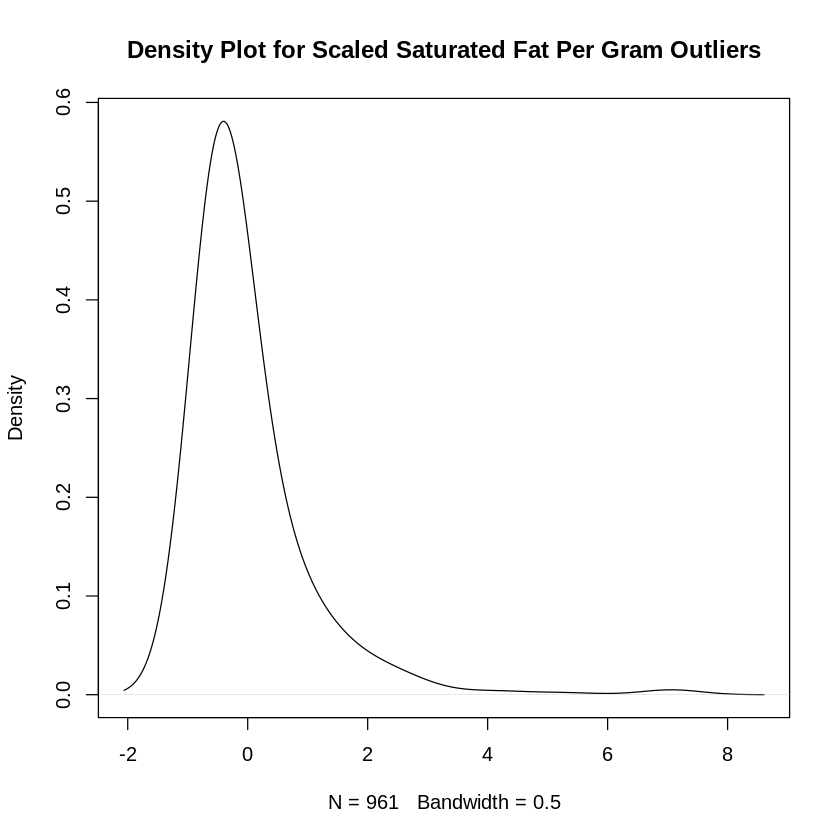

In [35]:
plot(density(nutrition_subset$scaled_sfpg, bw = 0.5), main = "Density Plot for Scaled Saturated Fat Per Gram Outliers")

As you can see from this analysis on the data set, most of the foods that were analyzed are on the lower end for saturated fat. However, there are 15 outliers on the higher end causing the data set to look skewed. There are clearly 0 outliers on the low end, but there are a few deep high end outliers. The printed values show this as well as the small bumps in the density plot.

## 6. Are there any missing values? If so, impute as necessary and explain your approach.

In [36]:
#Check if there are any null/missing values in the data set
print(colSums(is.na(nutrition_subset)) > 0)

             food item        weight_in_grams          saturated_fat 
                 FALSE                  FALSE                  FALSE 
           cholesterol saturated_fat_per_gram                        
                 FALSE                  FALSE                  FALSE 


After double checking, there are no missing values in the data set. As I mentioned at the beginning, there was also no noise to clean.

## 7. Standardize (zero mean) the numeric variables, and determine if there are any outliers.

### a. Weight In Grams

In [37]:
#Create a new column and scale the weight in grams data
nutrition_subset$scaled_weight <- scale(x = nutrition_subset$weight_in_grams)

#Define the 3 sigma rule for determining outliers
threeSigRuleW <- (nutrition_subset$scaled_weight > 3) | (nutrition_subset$scaled_weight < -3)

#Create a variable that tracks the outliers using the 3 sigma rule
weight_outliers <- nutrition_subset$scaled_weight[which(threeSigRuleW)]

#Print out the number of weight outliers
cat("number of outliers in weight in grams =", length(weight_outliers))

number of outliers in weight in grams = 22

### b. Saturated Fat

In [38]:
#Create a new column and scale the saturated fat data
nutrition_subset$scaled_satfat <- scale(x = nutrition_subset$saturated_fat)

#Define the 3 sigma rule for determining outliers
threeSigRuleSF <- (nutrition_subset$scaled_satfat > 3) | (nutrition_subset$scaled_satfat < -3)

#Create a variable that tracks the outliers using the 3 sigma rule
satfat_outliers <- nutrition_subset$scaled_satfat[which(threeSigRuleSF)]

#Print out the number of saturated fat outliers
cat("number of outliers in saturated fat =", length(satfat_outliers))

number of outliers in saturated fat = 20

### c. Cholesterol

In [39]:
#Create a new column and scale the cholesterol data
nutrition_subset$scaled_cholesterol <- scale(x = nutrition_subset$cholesterol)

#Define the 3 sigma rule for determining outliers
threeSigRuleC <- (nutrition_subset$scaled_cholesterol > 3) | (nutrition_subset$scaled_cholesterol < -3)

#Create a variable that tracks the outliers using the 3 sigma rule
cholesterol_outliers <- nutrition_subset$scaled_cholesterol[which(threeSigRuleC)]

#Print out the number of cholesterol outliers
cat("number of outliers in cholesterol =", length(cholesterol_outliers))

number of outliers in cholesterol = 17

After standardizing all of the numeric values in this data set, I discovered that each column has a few outliers. All of these values have more outliers than the saturated fat per gram column (15) that I had previously analyzed.
- Weight has 22
- Saturated fat has 20
- Cholesterol has 17

## 8. Summarize your findings.
- I found that I did not need to impute or replace any values in this data set.
- Comparing foods of different sizes or weights can be innacurate because of the saturated fat per gram ratio.
- Food items like butter had the highest fat per gram, but were topped in overall saturated fats by  larger items like the pies.
- This data set had 0 low end outliers in the saturated fats per gram category because most of the food items in this set tend to be on the leaner side.
- The first quartile values and below for both cholesterol and saturated fats are all zeros.
- The data set as a whole had minimal outliers, with weight being the most at 22, and saturated fat per gram being the least at 15.

### Sources
- https://github.com/bforoura/IDS/blob/main/Portuguese_Bank_R.ipynb
- https://github.com/bforoura/IDS/blob/main/HW4/adult_training.csv